In [1]:
! pip install transformers

In [2]:
! wget https://raw.githubusercontent.com/DriveMyScream/Python_libraries/main/helper_functions.py

--2024-04-14 15:37:59--  https://raw.githubusercontent.com/DriveMyScream/Python_libraries/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7752 (7.6K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   7.57K  --.-KB/s    in 0s      

2024-04-14 15:37:59 (80.3 MB/s) - ‘helper_functions.py’ saved [7752/7752]



In [3]:
from helper_functions import (make_confusion_matrix, plot_loss_curves, calculate_results, plot_class_accuracy,
                              plot_prediction_confidence_histogram, create_tensorboard_callback)

In [4]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from transformers import pipeline
import pandas as pd

In [6]:
df = pd.read_csv("/content/clean_indian_news_data_version4.csv")

In [7]:
classifier = pipeline("text-classification", "DriveMyScream/bert-base-uncased-finetuned-fake_news_classification", framework="tf")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/754 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/438M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at DriveMyScream/bert-base-uncased-finetuned-fake_news_classification.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [19]:
new_df = df.sample(100)

In [20]:
class_labels = ['fake', 'real']
label2id = {'fake': 0, 'real': 1}
id2label = {0: "fake", 1: "real"}

In [21]:
sentences_list = []
actual_labels = []
predicted_labels = []
probability_scores_list = []

for index, row in new_df.iterrows():
    text = row['clean_text']
    label = label2id[row['label']]
    result = classifier(text)[0]
    predicted_labels.append(label2id[result['label']])
    actual_labels.append(label)
    sentences_list.append(text)
    probability_scores_list.append(result['score'])

In [22]:
true_value = np.array(actual_labels)
predicted_value = np.array(predicted_labels)

In [23]:
model_1_results = calculate_results(y_true = true_value,
                                    y_pred = predicted_value)
model_1_results

{'accuracy': 94.0,
 'precision': 0.9399264705882353,
 'recall': 0.94,
 'f1': 0.939538670284939}

Confusion Matrix


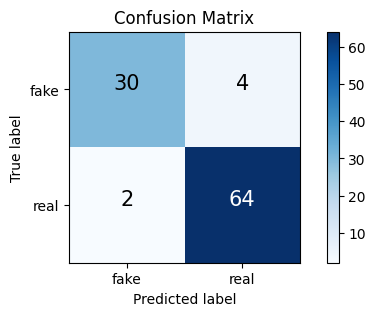

In [24]:
print("Confusion Matrix")
make_confusion_matrix(y_true = true_value,
                      y_pred = predicted_value,
                      classes = class_labels,
                      figsize = (7, 3))

In [25]:
print("Classification Report")
print(classification_report(true_value, predicted_value))

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        34
           1       0.94      0.97      0.96        66

    accuracy                           0.94       100
   macro avg       0.94      0.93      0.93       100
weighted avg       0.94      0.94      0.94       100



ClassWise Accuracy


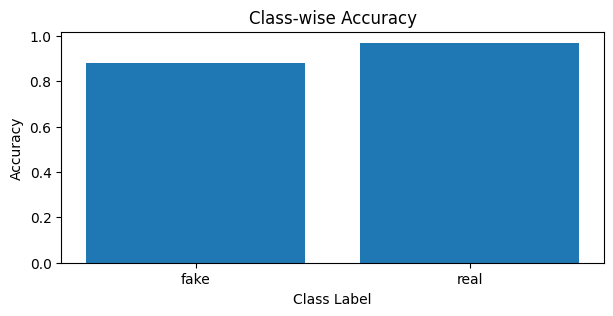

In [26]:
print("ClassWise Accuracy")
plot_class_accuracy(num_classes = 2,
                    y_true = true_value,
                    y_pred = predicted_value,
                    classes = class_labels,
                    figsize = (7, 3))

In [27]:
fpr, tpr, thresholds = roc_curve(true_value, predicted_value)
auc = roc_auc_score(true_value, predicted_value)

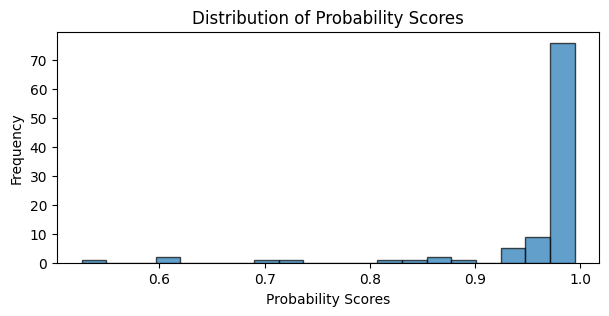

In [31]:
plt.figure(figsize=(7, 3))
plt.hist(probability_scores_list, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Probability Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Probability Scores')
plt.show()

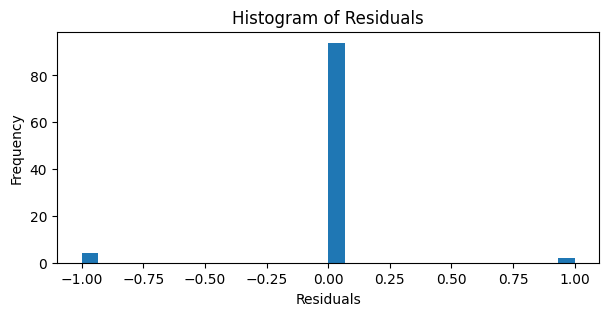

In [32]:
plt.figure(figsize=(7, 3))
residuals = true_value - predicted_value
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()